# Project submission

#### By Vishesh Dabas 

### First we will import the necessary libraries required for the analysis


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import mysql.connector

### Now that we have all the libraries we need, we will create a connection between MySQL workbench and Jupyter notebook


In [11]:
# a connection named <conn> will be established by providing the host ID, name of the database to be analysed and the user credentials for MySQL Workbench 

conn = mysql.connector.connect(host='127.0.0.1', database='terpbuy', user='Agent47', password='T4nushD@b4s')

## Solution to Problem Statement:1

### Generate a SQL query showing the total number of orders supplied by each department.

In [3]:
# We will create a DataFrame by using the <read_sql()> function which requires 2 arguement:
   # 1: The SQL query we need # 2: name on the connection we have establisd with MySql

#Here we will 1st import the result of our query as <dfcx>
dfcx= pd.read_sql("select d.department_name, count(ol.order_id) as 'Total Orders' from department d inner join product p on p.department_id = d.department_id inner join order_line ol on ol.product_id = p.product_id group by d.department_name order by count(ol.order_id) desc ;", conn)

# Secondly we will output the result of our Query as a DataFrame <dfcx1>

dfcx1 = pd.DataFrame(dfcx)

#Next we will create an index for our DataFrame 

dfcx1.index= dfcx1['department_name'] 

# We will rename the index as per the values in column <department_name> for visualisation purposes

del dfcx1['department_name']  # we will delete the ordignal column for readibility and cleaning purposes

dfcx1 #Output the DataFrame

C:\Users\admin\AppData\Local\Temp\ipykernel_6272\4278538806.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfcx= pd.read_sql("select d.department_name, count(ol.order_id) as 'Total Orders' from department d inner join product p on p.department_id = d.department_id inner join order_line ol on ol.product_id = p.product_id group by d.department_name order by count(ol.order_id) desc ;", conn)


,Total Orders
department_name,
Fan Shop,1556
Apparel,1252
Golf,772
Footwear,319
Outdoors,310
Discs Shop,285
Fitness,120
Health and Beauty,64
Pet Shop,54


## Solution to Problem Statement:2
### Generate a Visual representation of our SQL Query, showing the total number of orders supplied by each department.

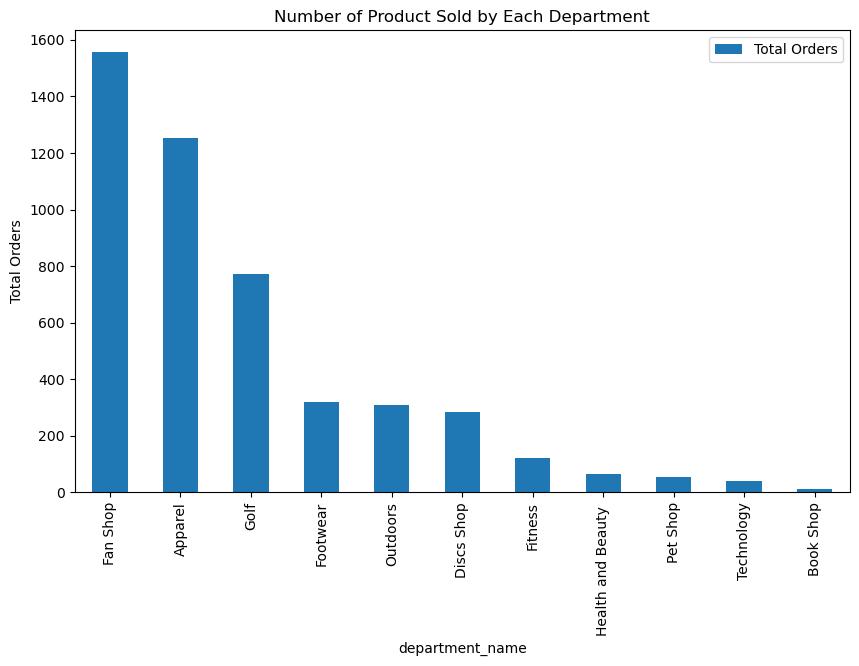

In [4]:
# We will use the DataFrame we have created in our previous solution i.e. <dfcx1>



dfcx.plot(kind='bar', y='Total Orders', figsize=(10, 6));
plt.title('Number of Product Sold by Each Department')

# set the labels for x and y axis

plt.xlabel('department_name')
plt.ylabel('Total Orders')


plt.show() #output the Graph

## Solution to Problem Statement:3
### Generate a SQL Query, showing the total number of orders per year.

In [5]:
#Step: Typing the query that need to be generated

dfcx2= pd.read_sql("SELECT YEAR(order_date) AS year, COUNT(*) AS order_count FROM orders GROUP BY YEAR(order_date) ORDER BY year ; ", conn)
dfcx3 = pd.DataFrame(dfcx2) #Step 2:Output the qury into a DataFrame

dfcx3.index= np.arange(1,5) # Step 3: Rename the index of DataFrame


dfcx3 #Output the DataFrame

C:\Users\admin\AppData\Local\Temp\ipykernel_6272\78037125.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfcx2= pd.read_sql("SELECT YEAR(order_date) AS year, COUNT(*) AS order_count FROM orders GROUP BY YEAR(order_date) ORDER BY year ; ", conn)


,year,order_count
1,2018,585
2,2019,708
3,2020,497
4,2021,362


## Solution to Problem Statement:4
### Generate a Visual representation of our SQL Query; showing the total number of orders per year.

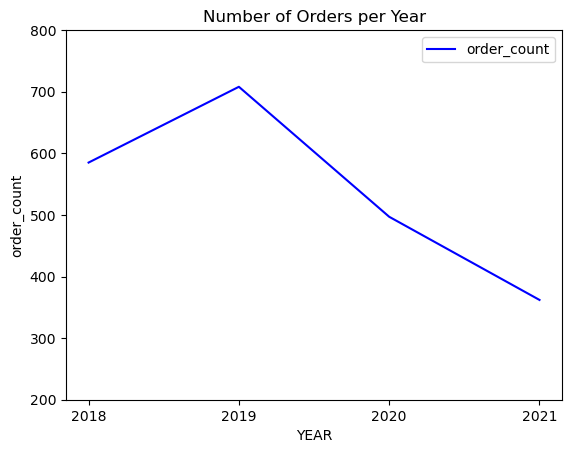

In [6]:
#We Will use the function in Matplotlib library's pyplot package to generate graphic representation of SQL Queries

dfcx3.plot(kind='line', x='year', y='order_count', color='blue') 
plt.title('Number of Orders per Year')
plt.xlabel('YEAR')
plt.ylabel('order_count')

# Set x and y axis limits
plt.xticks(dfcx3['year'].values)  # This will set the x-axis ticks to our years
plt.ylim([200, 800])  # The ymin and ymax values can be set if desired.

plt.show() #output the graph